In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
import re

In [3]:
data=pd.read_csv('train.csv')

In [4]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [12]:
data=data.dropna()
messages=data.copy()
messages.reset_index(inplace=True)

# Data Preprocesing

In [15]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps=PorterStemmer()
lm=WordNetLemmatizer()
corpus=[]
for i in range(len(messages)):
    review=re.sub('[^a-zA-Z]',' ',messages['title'][i])
    review=review.lower()
    review=review.split()
    review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
    reveiw=' '.join(review)
    corpus.append(reveiw)

In [54]:

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus1 = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer

# Tfidf Vectorizer


In [55]:
tfidf=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X1=tfidf.fit_transform(corpus1).toarray()
y1=messages['label']

In [56]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [57]:
tfidf.get_feature_names()[:5]

['aaron', 'abandon', 'abc', 'abe', 'abedin']

In [58]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

# Hashing Vectorizer

In [47]:
hashing=HashingVectorizer(max_features=5000,ngram_range=(1,3))
hashing.fit_transform(corpus).toarray()

TypeError: __init__() got an unexpected keyword argument 'max_features'

# Count Vectorizer(BOW)

In [18]:
cv=CountVectorizer(max_features=5000,ngram_range=(1,3))
X=cv.fit_transform(corpus).toarray()

In [19]:
y=messages['label']

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

# Features

In [23]:
cv.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest']

# Parameters

In [26]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [27]:
count_df=pd.DataFrame(X_train,columns=cv.get_feature_names())
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Plot Confusion_matrix

In [28]:
def plot_confusion_matrix(cm,classes,normalize=False,
                         title='confusion_matrix',
                         cmap=plt.cm.Blues):
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes,rotation=45)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Multinomial Naive bayes

0.894
Confusion matrix, without normalization


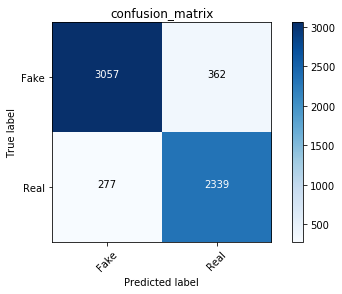

In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

from sklearn import metrics
import itertools
classifier.fit(X_train,y_train)
pred=classifier.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print(round(score,3))
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['Fake','Real'])

0.894
Confusion matrix, without normalization


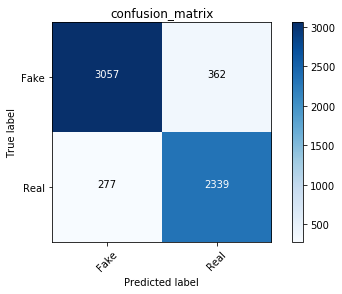

In [59]:
from sklearn.naive_bayes import MultinomialNB
classifier1=MultinomialNB()
classifier1.fit(X1_train,y1_train)
pred1=classifier1.predict(X1_test)
score1=metrics.accuracy_score(y1_test,pred1)
print(round(score1,3))
cm1=metrics.confusion_matrix(y1_test,pred1)
plot_confusion_matrix(cm1,classes=['Fake','Real'])

# Passive Agressive Classifier

In [33]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf=PassiveAggressiveClassifier()

0.914
Confusion matrix, without normalization


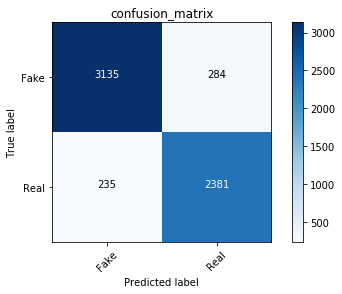

In [34]:
linear_clf.fit(X_train,y_train)
pred=linear_clf.predict(X_test)
score=metrics.accuracy_score(y_test,pred)
print(round(score,3))
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['Fake','Real'])

0.913
Confusion matrix, without normalization


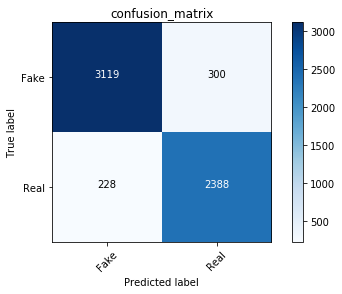

In [60]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf1=PassiveAggressiveClassifier()
linear_clf1.fit(X1_train,y1_train)
pred2=linear_clf1.predict(X1_test)
score2=metrics.accuracy_score(y1_test,pred2)
print(round(score2,3))
cm2=metrics.confusion_matrix(y1_test,pred2)
plot_confusion_matrix(cm2,classes=['Fake','Real'])

# Multinomial Classifier with Hyperparameter

In [48]:

classifier=MultinomialNB(alpha=0.1)

In [49]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8851698425849213
Alpha: 0.1, Score : 0.8939519469759735
Alpha: 0.2, Score : 0.8952775476387739
Alpha: 0.30000000000000004, Score : 0.895940347970174
Alpha: 0.4, Score : 0.8956089478044739
Alpha: 0.5, Score : 0.895774647887324
Alpha: 0.6000000000000001, Score : 0.8946147473073737
Alpha: 0.7000000000000001, Score : 0.8944490472245236
Alpha: 0.8, Score : 0.8939519469759735
Alpha: 0.9, Score : 0.8944490472245236


In [50]:
## Get Features names
feature_names = cv.get_feature_names()

In [51]:

classifier.coef_[0]

array([ -9.10753894,  -8.62991138,  -9.10753894, ..., -10.80213466,
        -8.76525273,  -9.33579759])

In [52]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]


[(-3.975468930864329, 'trump'),
 (-4.278572351977045, 'hillari'),
 (-4.3708035761930795, 'clinton'),
 (-4.862255845823476, 'elect'),
 (-5.2165519726230825, 'new'),
 (-5.229136031303992, 'comment'),
 (-5.29906403204266, 'video'),
 (-5.359716947604764, 'war'),
 (-5.374252087223877, 'hillari clinton'),
 (-5.403971956608805, 'fbi'),
 (-5.424287535955217, 'us'),
 (-5.471565247741333, 'email'),
 (-5.482382010858456, 'vote'),
 (-5.561564113790845, 'obama'),
 (-5.615991088470394, 'world'),
 (-5.748723723564097, 'donald'),
 (-5.770245357669475, 'donald trump'),
 (-5.807177176749532, 'russia'),
 (-5.822340469552877, 'presid'),
 (-5.8377372325235894, 'america')]

In [53]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-10.802134658126558, 'abroad'),
 (-10.802134658126558, 'abus new'),
 (-10.802134658126558, 'abus new york'),
 (-10.802134658126558, 'accid'),
 (-10.802134658126558, 'act new'),
 (-10.802134658126558, 'act new york'),
 (-10.802134658126558, 'adopt'),
 (-10.802134658126558, 'advic'),
 (-10.802134658126558, 'advis new'),
 (-10.802134658126558, 'advis new york'),
 (-10.802134658126558, 'age new'),
 (-10.802134658126558, 'age new york'),
 (-10.802134658126558, 'agenda breitbart'),
 (-10.802134658126558, 'aleppo new'),
 (-10.802134658126558, 'aleppo new york'),
 (-10.802134658126558, 'ali'),
 (-10.802134658126558, 'amazon'),
 (-10.802134658126558, 'america breitbart'),
 (-10.802134658126558, 'america new york'),
 (-10.802134658126558, 'american breitbart'),
 (-10.802134658126558, 'american new'),
 (-10.802134658126558, 'american new york'),
 (-10.802134658126558, 'ami'),
 (-10.802134658126558, 'ami schumer'),
 (-10.802134658126558, 'amp'),
 (-10.802134658126558, 'angela'),
 (-10.8021346581